# Анализ оттока клиентов «Метанпром» банка

## Материалы
[Презентация](https://disk.yandex.ru/i/bcmQY8qYbl5vHw)

**Краткое описание проекта**

Заказчик исследования — отдел маркетинга банка «Метанпром». Банк располагается в Ярославле, Ростове и Рыбинске.
Необходимо проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

**Цель проекта**

Максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока клиентов.

**Описание данных**

Данные о клиентах банка:

    - user_id - идентификатор пользователя;
    - score - баллы кредитного скоринга;
    - city - город;
    - gender - пол;
    - age - возраст;
    - equity - количество баллов собственности;
    - balance - баланс на счёте;
    - products - количество продуктов, которыми пользуется клиент;
    - credit_card - наличие кредитной карты;
    - last_activity - активность клиента;
    - estimated_salary - заработная плата клиента;
    - churn - факт оттока клиента.
    
**План работы**

1. Открыть файл с данными и изучить общую информацию;
2. Подготовить данные:
 - Закодировать значения столбцов gender и city
 - Заменить названия столбцов
 - Проверить данные на наличие пропусков, определить тип пропусков, объяснить их заполнение/незаполнение
 - Привести данные к нужному типу
 - Проверить данные на дубликаты
 - Проверить данные на аномалии
3. Провести исследовательский анализ данных:
 - Посмотреть на средние значения признаков для отточных и оставшихся клиентов
 - Построить распределения и столбчатые гистограммы признаков для тех, кто ушёл и тех, кто остался
 - По столбцам score, balance, est_salary, age добавить новые колонки с интервалами
 - Найти средний отток по банку
 - Найти уровни оттока по категориям
 - Проанализировать все данные на предмет наличия корреляций с целевой характеристикой
4. Проверить гипотезы;
5. Провести сегментацию клиентов на основе показателей;
6. Выявить показатели, влияющие на отток
7. Сделать выводы и дать базовые рекомендации по работе с клиентами.

## Открытие файла с данными и изучение общей информации

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import kstest

In [2]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"# сохраняем путь к данным в переменной path

In [3]:
df = pd.read_csv(path)# читаем файл с данными и сохраняем в df

In [4]:
df.head()# выводим первые 5 строк датафрейма

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
data = df.copy()# создадим копию исходного датафрейма

In [6]:
data.info()# выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [7]:
# выводим описательную статистику для каждой колонки датасета
for col in data:
    display(data[col].describe())

count     10000.00000
mean     171814.71260
std       33708.23812
min       94561.00000
25%      142810.25000
50%      172728.00000
75%      201261.75000
max      229145.00000
Name: USERID, dtype: float64

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

count         10000
unique            3
top       Ярославль
freq           5888
Name: city, dtype: object

count     10000
unique        2
top           М
freq       5005
Name: gender, dtype: object

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

count    10000.000000
mean         2.627600
std          1.980836
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: equity, dtype: float64

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

count    10000.000000
mean         1.870100
std          0.792647
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

count    10000.000000
mean         0.680400
std          0.466345
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: credit_card, dtype: float64

count    10000.000000
mean         0.523500
std          0.499472
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: last_activity, dtype: float64

count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: EST_SALARY, dtype: float64

count    10000.000000
mean         0.182000
std          0.385864
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

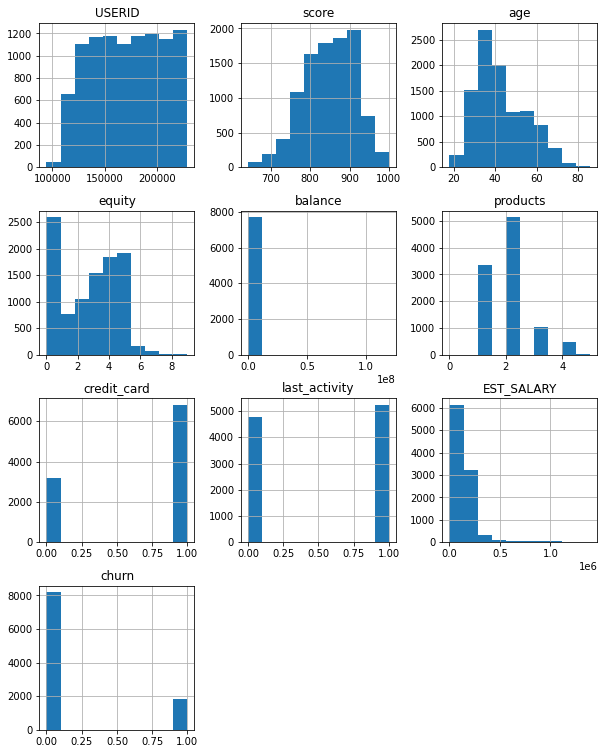

In [8]:
data.hist(figsize=(10,13));# посмотрим на распределение данных во всем датасете

**Вывод**: Мы ознакомились с данными. Вывели основную информацию о датафрейме и увидели, что он содержит 12 столбцов и 10000 строк. Также в данных видны пропуски и в названиях столбцов присутствует верхний регистр и отсутствует змеиный регистр. Тип данных в некоторых столбцах необходимо будет поменять. В данных присутствуют категориальные и количественные переменные. По гистограмме видно наличие бинарных переменных, в столбцах с количественными признаками данные не совсем нормально распределены, проверим это позже.

## Подготовка данных

### Кодирование значений столбцов gender и city

Создадим копии колонок gender и city, так как при кодировке столбцы пропадут

In [9]:
data['gender_copy'] = data['gender']

In [10]:
data['city_copy'] = data['city']
data.head() # проверим создание копий колонок

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,gender_copy,city_copy
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,Ж,Рыбинск
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,Ж,Рыбинск
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,Ж,Рыбинск
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,Ж,Ярославль
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,М,Ярославль


In [11]:
data = pd.get_dummies(data, columns=['gender','city'])# закодируем категориальные значения

In [12]:
data.head()# проверим кодировку

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,gender_copy,city_copy,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,Ж,Рыбинск,1,0,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,Ж,Рыбинск,1,0,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,Ж,Рыбинск,1,0,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,Ж,Ярославль,1,0,0,0,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,М,Ярославль,0,1,0,0,1


### Замена названий столбцов 

In [13]:
data.columns = data.columns.str.lower()# переведем все названия столбцов в нижний регистр

In [14]:
# переименуем колонки
data = data.rename(columns={"gender_copy": "gender",
                     "city_copy": "city",
                     "gender_ж": "female",
                     "gender_м": "male",
                     "city_ростов": "rostov",
                     "city_рыбинск": "rybinsk",
                     "city_ярославль": "yaroslavl",
                     "userid": "user_id"
})

In [15]:
data.head()# проверим переименование колонок

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender,city,female,male,rostov,rybinsk,yaroslavl
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,Ж,Рыбинск,1,0,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,Ж,Рыбинск,1,0,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,Ж,Рыбинск,1,0,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,Ж,Ярославль,1,0,0,0,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,М,Ярославль,0,1,0,0,1


### Обработка пропусков

In [16]:
# посмотрим на пропуски во всех столбцах датафрейма
missing_values = data.isna().sum().to_frame()
missing_values = missing_values.rename(columns = {0: 'missing_values'})
missing_values['%_of_total'] = round((missing_values['missing_values']/data.shape[0])*100,2)
missing_values[(missing_values['missing_values']>0) & (missing_values['%_of_total']>0)]

,missing_values,%_of_total
age,26,0.26
balance,2295,22.95


Посмотрим, зависят ли признаки age и balance от других признаков

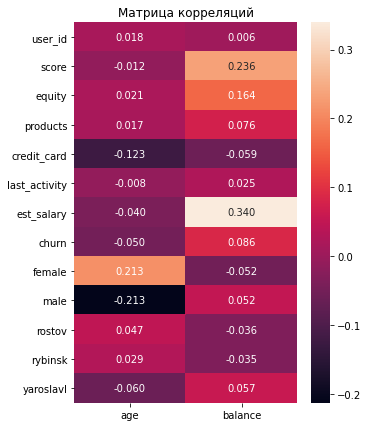

In [17]:
# построим матрицу корреляций
plt.figure(figsize=(5,7))
sns.heatmap(data.corr().loc[:,['age','balance']].drop(['age','balance']), annot=True, fmt=".3f")
plt.title("Матрица корреляций");

Связь слабая со всеми признаками у age и balance

Проверим, как еще могут зависеть пропуски в датафрейме

In [18]:
data[data['age'].isnull()]# посмотрим на датасет, где все значения age NaN

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender,city,female,male,rostov,rybinsk,yaroslavl
1247,228075,932.0,NaN,5,7601719.20,2,1,1,408121.16,0,М,Ярославль,0,1,0,0,1
2165,187635,692.0,NaN,0,NaN,1,1,1,160368.82,0,Ж,Рыбинск,1,0,0,1,0
2444,221156,913.0,NaN,0,NaN,1,1,1,135693.24,0,М,Ярославль,0,1,0,0,1
3091,138660,836.0,NaN,5,294315.53,2,0,1,63310.22,1,Ж,Ростов,1,0,1,0,0
4912,210674,834.0,NaN,1,238330.52,2,0,1,93775.06,0,М,Рыбинск,0,1,0,1,0
5470,218868,827.0,NaN,4,448959.07,2,1,1,67835.95,0,Ж,Рыбинск,1,0,0,1,0
5495,151662,884.0,NaN,0,NaN,1,1,1,137500.77,0,Ж,Рыбинск,1,0,0,1,0
7236,210135,908.0,NaN,4,1120340.31,3,1,1,85002.15,0,Ж,Рыбинск,1,0,0,1,0
7248,219343,920.0,NaN,0,NaN,1,1,0,159248.67,0,Ж,Рыбинск,1,0,0,1,0
7345,184913,829.0,NaN,3,188648.77,2,0,1,75206.90,0,Ж,Ярославль,1,0,0,0,1


In [19]:
data[data['balance'].isnull()].head(20)# посмотрим на датасет, где все значения balance NaN

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender,city,female,male,rostov,rybinsk,yaroslavl
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,Ж,Рыбинск,1,0,0,1,0
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,Ж,Ярославль,1,0,0,0,1
10,148929,927.0,52.0,0,NaN,1,1,1,196820.07,0,М,Ростов,0,1,1,0,0
11,172184,921.0,41.0,0,NaN,1,1,1,217469.48,0,М,Ростов,0,1,1,0,0
19,127034,922.0,53.0,0,NaN,1,0,0,147094.82,0,Ж,Рыбинск,1,0,0,1,0
21,177415,896.0,47.0,0,NaN,1,0,0,225060.35,0,Ж,Рыбинск,1,0,0,1,0
30,155730,946.0,47.0,0,NaN,2,1,1,660015.85,0,Ж,Ярославль,1,0,0,0,1
34,205226,944.0,35.0,0,NaN,2,1,1,239843.39,0,М,Ярославль,0,1,0,0,1
39,173175,924.0,51.0,0,NaN,1,1,1,248844.47,0,Ж,Рыбинск,1,0,0,1,0
43,228585,956.0,41.0,0,NaN,1,1,0,115117.10,0,М,Ростов,0,1,1,0,0


In [20]:
data.groupby(data['age'].isnull()).mean()# посмотрим на распределение средних значений признаков по наличию/отсутствию пропусков в возрасте

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
age,,,,,,,,,,,,,,,
False,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,147786.809731,0.182374,0.499599,0.500401,0.141969,0.268999,0.589031
True,194637.500000,855.153846,NaN,1.384615,1.250034e+06,1.346154,0.769231,0.769231,178585.199231,0.038462,0.461538,0.538462,0.038462,0.461538,0.500000


Создадим новую колонку, в которой пропуски в колонке возраста буду равны 1, а отсутствие пропусков = 0.

In [21]:
data['age_nan'] = np.where(data['age'].isnull(), 1,0)

In [22]:
data.groupby(['age_nan'])['equity'].value_counts(normalize=True)# посмотрим на баллы собственности у клиентов в зависимости от наличия записи о возрасте

age_nan  equity
0        0         0.258272
         5         0.191999
         4         0.185181
         3         0.154502
         2         0.105374
         1         0.077502
         6         0.016142
         7         0.008021
         8         0.001704
         9         0.001303
1        0         0.615385
         4         0.115385
         5         0.115385
         3         0.076923
         1         0.038462
         2         0.038462
Name: equity, dtype: float64

In [23]:
data.groupby(['age_nan'])['products'].value_counts(normalize=True)# посмотрим на имеющиеся продукты у клиентов в зависимости от наличия записи о возрасте

age_nan  products
0        2           0.513234
         1           0.333166
         3           0.104071
         4           0.047524
         5           0.001905
         0           0.000100
1        1           0.692308
         2           0.269231
         3           0.038462
Name: products, dtype: float64

In [24]:
data.groupby(data['balance'].isnull()).mean()# посмотрим на распределение средних значений признаков по наличию/отсутствию пропусков в балансе

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl,age_nan
balance,,,,,,,,,,,,,,,,
False,171738.837508,843.73926,42.924366,3.395068,827794.30651,2.080986,0.640104,0.515769,124501.872366,0.234523,0.516807,0.483193,0.153407,0.272810,0.573783,0.001298
True,172069.447930,865.35207,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,226310.208654,0.005664,0.441394,0.558606,0.102397,0.258388,0.639216,0.006972


Создадим новую колонку, в которой пропуски в колонке возраста буду равны 1, а отсутствие пропусков = 0.

In [25]:
data['balance_nan'] = np.where(data['balance'].isnull(), 1,0)

In [26]:
data.groupby(['balance_nan'])['products'].value_counts(normalize=True)# посмотрим на имеющиеся продукты у клиентов в зависимости от наличия записи о балансе

balance_nan  products
0            2           0.624400
             1           0.180532
             3           0.131084
             4           0.061518
             5           0.002466
1            1           0.849673
             2           0.137255
             3           0.012636
             0           0.000436
Name: products, dtype: float64

In [27]:
data.groupby(['balance_nan'])['equity'].value_counts(normalize=True)# посмотрим на баллы собственности у клиентов в зависимости от наличия записи о балансе

balance_nan  equity
0            5         0.248929
             4         0.240104
             3         0.200130
             2         0.136535
             1         0.085659
             0         0.053472
             6         0.020896
             7         0.010383
             8         0.002206
             9         0.001687
1            0         0.949891
             1         0.049673
             3         0.000436
Name: equity, dtype: float64

По пропущенным данным в колонках age и balance можно сказать, что пропусков много по городу Ярославль, но в нем у нас и клиентов тоже много, поэтому так может быть. Также, где есть пропуск в этих колонках, у таких клиентов наличие кредитных карт выше и доход. Есть разница в количестве используемых продуктов и баллах собственности. У клиентов, у которых не указан возраст, больше денег на счету и выше активность. Но объяснить такую зависимость мы не можем, поэтому  отнесем пропуски к типу MAR.

Соответственно строки с пропущенным значением в столбце age мы удалим, таких строк мало, их удаление не приведет к искажению результатов в данных, а вот пропущенные значения в balance мы оставим так как есть, потому что заполнять их медианой или нулями будет некорректно.

In [28]:
data = data[data['age'].notnull()]# удалим строки с NaN в age

In [29]:
data = data.drop(['balance_nan', 'age_nan'], axis = 1)

### Преобразование данных в нужные типы

In [30]:
data[['score', 'age']] = data[['score', 'age']].astype(int)# преобразуем данные в столбцах в нужный нам тип

In [31]:
data.info()# проверим удаление пропусков и преобразование в необходимые типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   age            9974 non-null   int64  
 3   equity         9974 non-null   int64  
 4   balance        7695 non-null   float64
 5   products       9974 non-null   int64  
 6   credit_card    9974 non-null   int64  
 7   last_activity  9974 non-null   int64  
 8   est_salary     9974 non-null   float64
 9   churn          9974 non-null   int64  
 10  gender         9974 non-null   object 
 11  city           9974 non-null   object 
 12  female         9974 non-null   uint8  
 13  male           9974 non-null   uint8  
 14  rostov         9974 non-null   uint8  
 15  rybinsk        9974 non-null   uint8  
 16  yaroslavl      9974 non-null   uint8  
dtypes: float64(2), int64(8), object(2), uint8(5)
memory 

### Проверка датафрейма на явные и неявные дубликаты, аномалии

In [32]:
data.duplicated().sum()# проверим датафрейм на явные дубликаты

0

Явных дубликатов не обнаружено

In [33]:
data['user_id'].value_counts().head(60)# посмотрим на дубликаты и на аномальные значения колонки user_id

120258    2
217643    2
199312    2
170312    2
200863    2
188957    2
141265    2
181526    2
208738    2
217826    2
210662    2
171751    2
129785    2
220816    2
211130    2
210627    2
210792    2
155872    2
217619    2
143592    2
226719    2
185748    2
175730    2
126368    2
152479    2
197364    2
183510    2
163207    2
117943    2
208081    2
208815    2
227795    2
149365    2
116540    2
155765    2
190253    2
150667    2
123461    2
172142    2
164676    2
195884    2
160075    2
168998    2
140377    2
217412    2
162053    2
131419    2
191520    2
124450    2
148826    2
146130    1
144091    1
183012    1
129762    1
133916    1
158432    1
146122    1
219942    1
217823    1
148261    1
Name: user_id, dtype: int64

В колонке user_id мы видим повторяющиеся идентификаторы клиентов, посмотрим на строки с одним из идентификаторов поближе

In [34]:
data[data['user_id'] == 120258]

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender,city,female,male,rostov,rybinsk,yaroslavl
5863,120258,908,38,4,2213581.63,2,0,1,160327.77,1,Ж,Рыбинск,1,0,0,1,0
5896,120258,905,30,0,NaN,1,1,1,146427.96,0,М,Ярославль,0,1,0,0,1


Мы видим, что под одним идентификатором два совершенно разных клиента. Это может быть из-за того, что мы анализируем 3 разных филиала банка, и у каждого банка могут быть свои идентификаторы, и возможно пересечение. Также, если в банках единая база, то такое может быть из-за того, что какой-то клиент раньше ушел и его id освободился, на его id перезаписали нового клиента.

In [35]:
data['score'].value_counts().sort_index()# посмотрим на аномальные значения колонки score

642     2
646     2
648     2
649     7
650     2
       ..
996     2
997     2
998     1
999     2
1000    6
Name: score, Length: 348, dtype: int64

In [36]:
data['age'].value_counts().sort_index()# посмотрим на аномальные значения колонки age

18    13
19    16
20    23
21    15
22    27
      ..
81     4
82     2
83     3
84     2
86     2
Name: age, Length: 68, dtype: int64

In [37]:
data['equity'].value_counts().sort_index()# посмотрим на аномальные значения колонки equity

0    2576
1     773
2    1051
3    1541
4    1847
5    1915
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

In [38]:
data['balance'].value_counts().sort_index()# посмотрим на аномальные значения колонки balance

0.000000e+00    2
6.000000e+00    1
7.000000e+00    1
2.000000e+01    1
2.100000e+01    1
               ..
2.572776e+07    1
2.900893e+07    1
4.327710e+07    1
6.486621e+07    1
1.191136e+08    1
Name: balance, Length: 7691, dtype: int64

In [39]:
data['products'].value_counts().sort_index()# посмотрим на аномальные значения колонки products

0       1
1    3323
2    5119
3    1038
4     474
5      19
Name: products, dtype: int64

Клиента с нулем продуктов удалим, так как это выбивающееся значение

In [40]:
data = data[data['products']!=0]

In [41]:
data['credit_card'].value_counts()# посмотрим на аномальные значения колонки credit_card

1    6784
0    3189
Name: credit_card, dtype: int64

In [42]:
data['last_activity'].value_counts()# посмотрим на аномальные значения колонки last_activity

1    5215
0    4758
Name: last_activity, dtype: int64

In [43]:
data['est_salary'].value_counts().sort_index()# посмотрим на аномальные значения колонки est_salary

2546.30       1
3487.33       1
5043.14       1
5341.50       1
7054.82       1
             ..
1296838.08    1
1307090.18    1
1333687.36    1
1363549.52    1
1395064.45    1
Name: est_salary, Length: 9970, dtype: int64

In [44]:
data['churn'].value_counts()# посмотрим на аномальные значения колонки churn

0    8155
1    1818
Name: churn, dtype: int64

In [45]:
data['gender'].value_counts()# посмотрим на аномальные значения колонки gender

М    4991
Ж    4982
Name: gender, dtype: int64

In [46]:
data['city'].value_counts()# посмотрим на аномальные значения колонки city

Ярославль    5875
Рыбинск      2682
Ростов       1416
Name: city, dtype: int64

In [47]:
# посмотрим на аномальные значения колонок еще таким способом
for col, i in zip(data,range(len(data.columns))):
    print(data.columns[i])
    display(data[col].sort_values().unique())

user_id


array([ 94561,  94590,  95384, ..., 229130, 229136, 229145])

score


array([ 642,  646,  648,  649,  650,  651,  652,  653,  654,  655,  656,
        657,  658,  659,  660,  661,  662,  663,  664,  665,  666,  667,
        668,  669,  670,  671,  673,  678,  680,  681,  682,  684,  685,
        686,  687,  688,  689,  690,  691,  692,  693,  694,  695,  696,
        697,  698,  699,  700,  701,  702,  703,  704,  705,  706,  707,
        708,  709,  710,  711,  712,  713,  714,  715,  716,  717,  718,
        719,  720,  721,  722,  723,  724,  725,  726,  727,  728,  729,
        730,  731,  732,  733,  734,  735,  736,  737,  738,  739,  740,
        741,  742,  743,  744,  745,  746,  747,  748,  749,  750,  751,
        752,  753,  754,  755,  756,  757,  758,  759,  760,  761,  762,
        763,  764,  765,  766,  767,  768,  769,  770,  771,  772,  773,
        774,  775,  776,  777,  778,  779,  780,  781,  782,  783,  784,
        785,  786,  787,  788,  789,  790,  791,  792,  793,  794,  795,
        796,  797,  798,  799,  800,  801,  802,  8

age


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86])

equity


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

balance


array([0.00000000e+00, 6.00000000e+00, 7.00000000e+00, ...,
       6.48662101e+07, 1.19113552e+08,            nan])

products


array([1, 2, 3, 4, 5])

credit_card


array([0, 1])

last_activity


array([0, 1])

est_salary


array([   2546.3 ,    3487.33,    5043.14, ..., 1333687.36, 1363549.52,
       1395064.45])

churn


array([0, 1])

gender


array(['Ж', 'М'], dtype=object)

city


array(['Ростов', 'Рыбинск', 'Ярославль'], dtype=object)

female


array([0, 1], dtype=uint8)

male


array([0, 1], dtype=uint8)

rostov


array([0, 1], dtype=uint8)

rybinsk


array([0, 1], dtype=uint8)

yaroslavl


array([0, 1], dtype=uint8)

Аномальное значение в колонке products убрали. В колонке user_id дубликаты ожидаемы. Больше дубликатов мы не нашли.

**Вывод**: Мы закодировали категориальные значения столбцов gender и city, переименовали колонки там, где это необходимо, пропуски определили к типу MAR. Строки с пропущенным значением в столбце age мы удалили, таких строк мало, их удаление не приведет к искажению результатов в данных, а вот пропущенные значения в balance мы оставили так как есть, потому что заполнять их медианой или нулями будет некорректно. Также мы преобразовали данные в нужные типы. Еще проверили датафрейм на явные и неявные дубликаты, аномалии. Явных дубликатов не обнаружено. Аномальное значение в колонке products убрали. В колонке user_id дубликаты  могут быть из-за того, что мы анализируем 3 разных филиала банка, и у каждого банка могут быть свои идентификаторы, и возможно пересечение. Также, если в банках единая база, то такое может быть из-за того, что какой-то клиент раньше ушел и его id освободился, на его id перезаписали нового клиента. Больше дубликатов мы не нашли.

## Исследовательский анализ данных

### Средние значения признаков для отточных и оставшихся клиентов

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался и посчитаем, на сколько процентов каждая из характеристик отточных больше (меньше) характеристики неотточных

In [48]:
prcnt = data.groupby('churn').agg('mean').T.reset_index()
prcnt = prcnt.rename(columns={0: 'stayed', 1: 'churn', 'index':'signs'})
prcnt = prcnt.rename_axis(None, axis=1)
prcnt['percentage_difference'] = round((1-(prcnt['stayed']/prcnt['churn']))*100,2)
prcnt.sort_values('percentage_difference', ascending = False, ignore_index=True)

,signs,stayed,churn,percentage_difference
0,equity,2.378296,3.763476e+00,36.81
1,balance,733031.630149,1.134458e+06,35.38
2,last_activity,0.482894,7.024202e-01,31.25
3,male,0.466953,6.507151e-01,28.24
4,products,1.758921,2.377338e+00,26.01
5,yaroslavl,0.583446,6.144114e-01,5.04
6,rostov,0.141140,1.457646e-01,3.17
7,score,845.396199,8.633619e+02,2.08
8,est_salary,147674.637881,1.483575e+05,0.46
9,user_id,171928.110607,1.709928e+05,-0.55


Средний возраст у клиентов, которые ушли 41-42 года, у клиентов, которые остались 43 года. 
Баланс на счете у клиентов, которые ушли в среднем 1134458, а у оставшихся клиентов 733032. 
Отточные клиенты реже заводят кредитные карты, но у отточных клиентов выше баллы собственности, значит объектов собственности у них тоже больше, чем у неотточных. 
Зарплаты примерно на одном уровне у ушедших и оставшихся клиентов в среднем по 148,4 и 147,7 тыс. соответственно.
Среди ушедших клиентов мужчин больше, чем женщин, среди оставшихся - наоборот.
Ушедшие клиенты были сильнее активны в банке, чем оставшиеся.
Отточные клиенты в среднем пользовались 2-3 продуктами, а неотточные 1-2.
Среди отточных клиентов больше всего клиентов из Ярославля, меньше всего из Ростова. Среди неотточных - то же самое.
Больше всего из характеристик влияют на отток баллы собственности, баланс, активность клиента, мужской пол, количество используемых продуктов.

### Распределения признаков для тех, кто ушёл и тех, кто остался

Посмотрим на распределения признаков для тех, кто ушёл и тех, кто остался

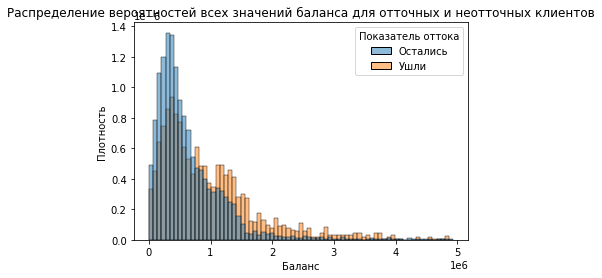

In [49]:
# посмотрим на распределение значений в столбце balance
ax = sns.histplot(data[data['balance'] <=5000000], x='balance',  hue = 'churn', stat = 'density', common_norm = False)
ax.set_title('Распределение вероятностей всех значений баланса для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Баланс')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

In [50]:
### КОД РЕВЬЮЕРА
data[data['balance'] <=5000000].churn.mean()

0.23350386986750624

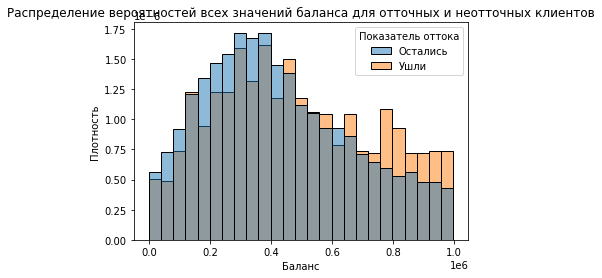

In [51]:
# посмотрим на распределение значений в столбце balance поближе
ax = sns.histplot(data[data['balance'] <=1000000], x='balance',  hue = 'churn', stat = 'density', common_norm = False)
ax.set_title('Распределение вероятностей всех значений баланса для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Баланс')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

In [52]:
### КОД РЕВЬЮЕРА
data[data['balance'] <=1000000].churn.mean()

0.18619031260735142

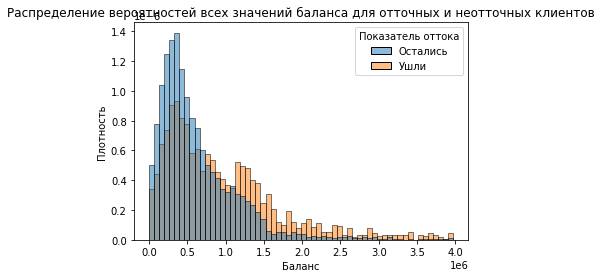

In [53]:
# посмотрим на распределение значений в столбце balance поближе
ax = sns.histplot(data[data['balance'] <=4000000], x='balance',  hue = 'churn', stat = 'density', common_norm = False)
ax.set_title('Распределение вероятностей всех значений баланса для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Баланс')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

Сильный отток начинается от 800000 на счете у клиентов и продолжается, но уже ослабевает у 3000000 на счете.

Построим диаграмму размаха для столбца balance, так как видно, что в нем есть много высоких значений

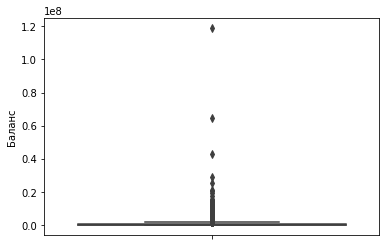

In [54]:
ax = sns.boxplot(y=data['balance']);
ax.set_ylabel('Баланс')
plt.show()

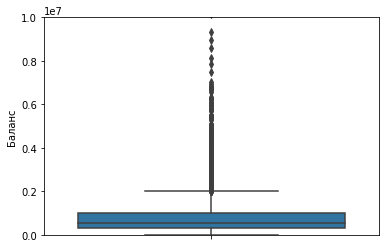

In [55]:
# посмотрим на диаграмму ближе
ax = sns.boxplot(y=data['balance']);
ax.set_ylabel('Баланс')
plt.ylim([0,10000000])
plt.show()

Да, есть высокие суммы на счете у пользователей, но оставим их, потому что скорее всего есть клиенты с такими высокими накоплениями.

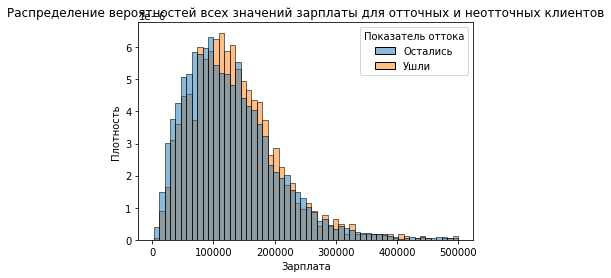

In [56]:
# посмотрим на распределение значений в столбце est_salary
ax = sns.histplot(data[data['est_salary'] <=500000], x='est_salary',  hue = 'churn', stat = 'density', common_norm = False)
ax.set_title('Распределение вероятностей всех значений зарплаты для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Зарплата')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

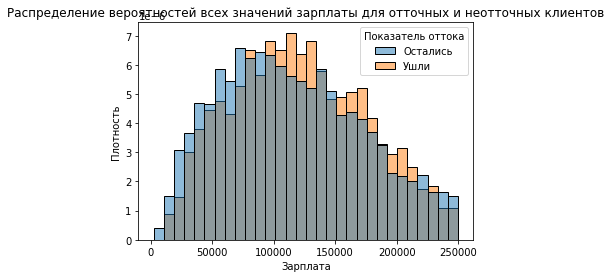

In [57]:
# посмотрим на распределение значений в столбце est_salary поближе
ax = sns.histplot(data[data['est_salary'] <=250000], x='est_salary',  hue = 'churn', stat = 'density', common_norm = False)
ax.set_title('Распределение вероятностей всех значений зарплаты для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Зарплата')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

Видно отток по зарплате у клиентов от 100 тыс. до 220 тыс.

Тоже построим диаграмму размаха для столбца с зарплатой клиентов, так как видно, что в нем есть много высоких значений

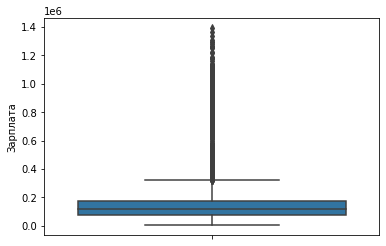

In [58]:
ax = sns.boxplot(y=data['est_salary']);
ax.set_ylabel('Зарплата')
plt.show()

Заметны высокие доходы у клиентов, но тоже их оставим , потому что скорее всего есть клиенты с такими высокими зарплатами.

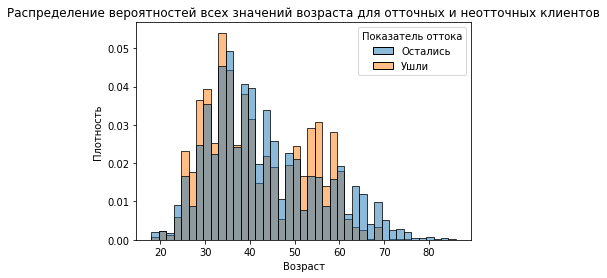

In [59]:
# посмотрим на распределение значений в столбце возраста
ax = sns.histplot(data, x='age',  hue = 'churn', stat = 'density', common_norm = False)
ax.set_title('Распределение вероятностей всех значений возраста для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Возраст')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

Отток у клиентов замечен в возрасте 25-34 лет и 50-60 лет.

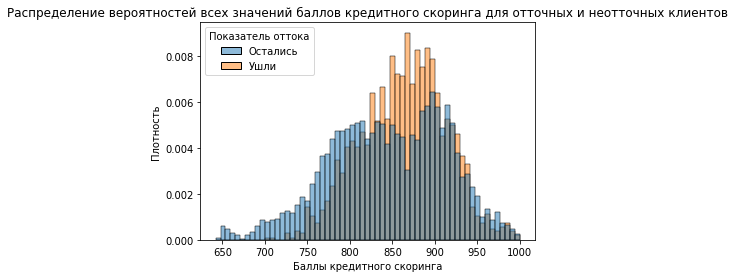

In [60]:
# посмотрим на распределение значений в столбце баллов кредитного скоринга
ax = sns.histplot(data, x='score',  hue = 'churn', stat = 'density', common_norm = False, bins = 61)
ax.set_title('Распределение вероятностей всех значений баллов кредитного скоринга для отточных и неотточных клиентов')
ax.set_ylabel('Плотность')
ax.set_xlabel('Баллы кредитного скоринга')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока')
plt.show()

По баллам кредитного скоринга виден отток от 840 до 900 баллов.

Сильный отток начинается от 800000 на счете у клиентов и продолжается, но уже ослабевает у 3000000 на счете. Видно отток по зарплате у клиентов от 100 тыс. до 220 тыс. Отток у клиентов замечен в возрасте 25-34 лет и 50-60 лет. По баллам кредитного скоринга отток виден от 840 до 900 баллов.

### Добавление новых колонок с интервалами

Создадим интервалы для столбцов age, balance, score, est_salary

In [61]:
data['age_intervals'] = pd.cut(data['age'], [18,25,34,50,60,86], right=False, labels=['18-25', '25-34', '34-50',
                            '50-60', '60-86'])

In [62]:
data['balance_intervals'] = pd.cut(data['balance'], [0,800000,3000000,120000000], right=False, labels=['0-800000', '800000-3000000', '3000000-120000000'])

In [63]:
data['score_intervals'] = pd.cut(data['score'], [650,840,900,1000], right=False, labels=['650-840', '840-900', '900-1000'])

In [64]:
data['est_salary_intervals'] = pd.cut(data['est_salary'], [0,100000,220000,1396000], right=False, labels=['0-100000', '100000-220000', '220000-1396000'])

In [65]:
# посмотрим на новые колонки
pd.set_option('max_columns', None)
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender,city,female,male,rostov,rybinsk,yaroslavl,age_intervals,balance_intervals,score_intervals,est_salary_intervals
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,Ж,Рыбинск,1,0,0,1,0,25-34,0-800000,840-900,0-100000
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,Ж,Рыбинск,1,0,0,1,0,34-50,800000-3000000,840-900,0-100000
2,120722,892,30,0,NaN,1,1,1,107683.34,0,Ж,Рыбинск,1,0,0,1,0,25-34,NaN,840-900,100000-220000
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,Ж,Ярославль,1,0,0,0,1,50-60,800000-3000000,840-900,100000-220000
4,157978,730,34,5,174.00,1,1,0,67353.16,1,М,Ярославль,0,1,0,0,1,34-50,0-800000,650-840,0-100000


### Средний отток по банку

Найдем средний отток по банку

In [66]:
average_churn = round(data['churn'].mean(),2)
average_churn

0.18

Средний отток по банку составляет 18%

### Уровни оттока по категориям

Посмотрим на распределения признаков для тех, кто ушёл и тех, кто остался

In [67]:
for col in ['age_intervals', 'balance_intervals', 'city', 'credit_card', 'equity','est_salary_intervals', 'gender', 'last_activity', 'products', 'score_intervals']:
    percent_churn = round(data.groupby(col).agg({"churn":["mean","sum","count"]}),3)
    percent_churn.columns = ['churn_mean', 'churn_sum', 'churn_count']
    percent_churn['%_of_churn'] = percent_churn['churn_mean']*100
    percent_churn['%_of_stayed'] = (1 - percent_churn['churn_mean'])*100
    display(percent_churn.sort_values(by='%_of_churn', ascending = False))

,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
age_intervals,,,,,
50-60,0.270,432,1600,27.0,73.0
25-34,0.219,500,2283,21.9,78.1
34-50,0.162,753,4654,16.2,83.8
18-25,0.131,31,236,13.1,86.9
60-86,0.085,102,1198,8.5,91.5


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
balance_intervals,,,,,
3000000-120000000,0.455,91,200,45.5,54.5
800000-3000000,0.345,797,2307,34.5,65.5
0-800000,0.177,918,5188,17.7,82.3


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
city,,,,,
Ярославль,0.190,1117,5875,19.0,81.0
Ростов,0.187,265,1416,18.7,81.3
Рыбинск,0.163,436,2682,16.3,83.7


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
credit_card,,,,,
0,0.256,815,3189,25.6,74.4
1,0.148,1003,6784,14.8,85.2


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
equity,,,,,
9,0.538,7,13,53.8,46.2
7,0.462,37,80,46.2,53.8
6,0.360,58,161,36.0,64.0
8,0.353,6,17,35.3,64.7
5,0.301,576,1915,30.1,69.9
4,0.251,464,1847,25.1,74.9
3,0.208,321,1540,20.8,79.2
2,0.158,166,1051,15.8,84.2
1,0.120,93,773,12.0,88.0


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
est_salary_intervals,,,,,
100000-220000,0.205,963,4708,20.5,79.5
220000-1396000,0.172,231,1341,17.2,82.8
0-100000,0.159,624,3924,15.9,84.1


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
gender,,,,,
М,0.237,1183,4991,23.7,76.3
Ж,0.127,635,4982,12.7,87.3


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
last_activity,,,,,
1,0.245,1277,5215,24.5,75.5
0,0.114,541,4758,11.4,88.6


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
products,,,,,
4,0.633,300,474,63.3,36.7
5,0.421,8,19,42.1,57.9
3,0.286,297,1038,28.6,71.4
2,0.191,978,5119,19.1,80.9
1,0.071,235,3323,7.1,92.9


,churn_mean,churn_sum,churn_count,%_of_churn,%_of_stayed
score_intervals,,,,,
840-900,0.259,807,3115,25.9,74.1
900-1000,0.175,436,2493,17.5,82.5
650-840,0.132,574,4346,13.2,86.8


По уровню оттока в возрастной категории больше всего клиентов 50-60 лет и 25-34. Отток больше у людей с балансом на счете от 800000 тыс до 120 млн., клиентов из Ярославля также больше ушедших, чем из других городов, и у ушедших чаще нет кредитной карты, высокий процент ушедших наблюдается у людей с баллами собстенности от 5 до 9 и отток выше среднебанковского. Отток у людей с зарплатой 100 тыс-220 тыс больше всего. Процент ушедших мужчин выше, чем женщин. Отточные пользователи были чаще активны. Высокий отток наблюдается у клиентов, использовавших 4-5 продуктов - их отток выше среднебанковского. Также отток больше у людей с баллами кредитного скоринга от 840 до 900.

### Cтолбчатые гистограммы признаков для тех, кто ушёл и тех, кто остался

In [68]:
# в переменную data_col сохраним названия столбцов, по которым будем строить гистограммы
data_col = ['age_intervals', 'city', 'credit_card', 'equity', 'gender', 'last_activity', 'products', 'score_intervals', 'balance_intervals', 'est_salary_intervals']

In [69]:
# в переменную name_col сохраним названия оси x
name_col = ['Возраст',
            'Город',
            'Наличие кредитной карты',
            'Количество баллов собственности',
            'Пол',
            'Активность',
            'Количество продуктов',
            'Баллы кредитного скоринга',
            'Баланс на счете',
            'Зарплата'
]

In [70]:
# в переменную name сохраним названия гистограмм
name = ['Распределение отточных и неотточных клиентов по возрасту',
        'Распределение отточных и неотточных клиентов по городам',
        'Распределение отточных и неотточных клиентов по наличию кредитной карты',
        'Распределение отточных и неотточных клиентов по количеству баллов собственности',
        'Распределение отточных и неотточных клиентов по полу',
        'Распределение отточных и неотточных клиентов по активности',
        'Распределение отточных и неотточных клиентов по количеству продуктов',
        'Распределение отточных и неотточных клиентов по баллам кредитного скоринга',
        'Распределение отточных и неотточных клиентов по балансу на счете',
        'Распределение отточных и неотточных клиентов по зарплате'
]

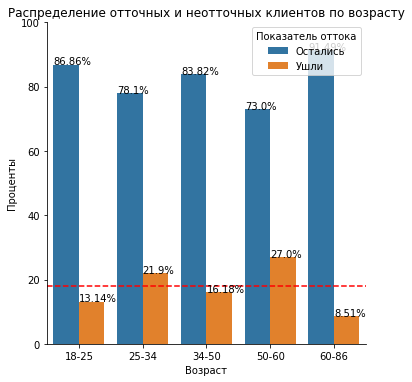

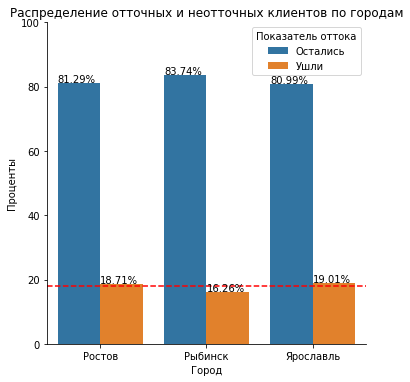

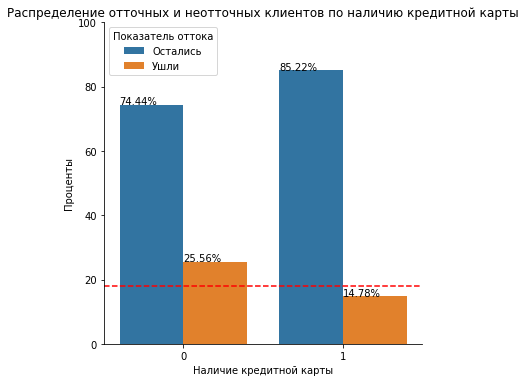

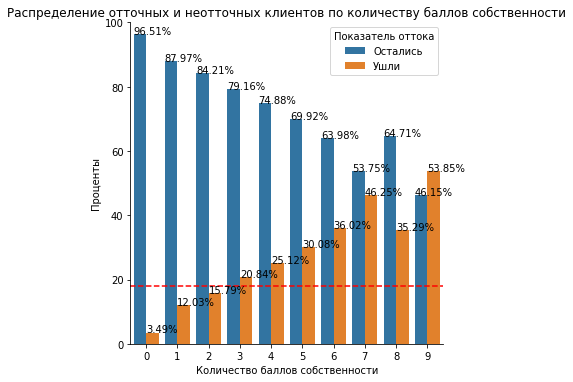

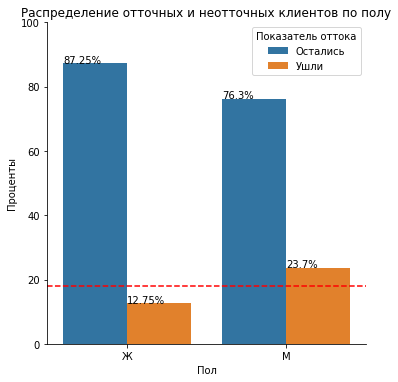

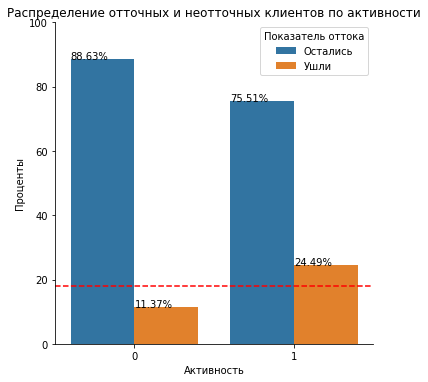

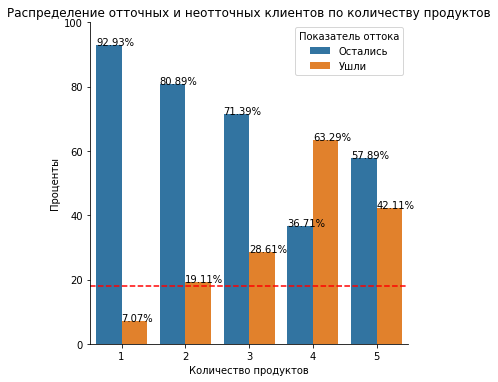

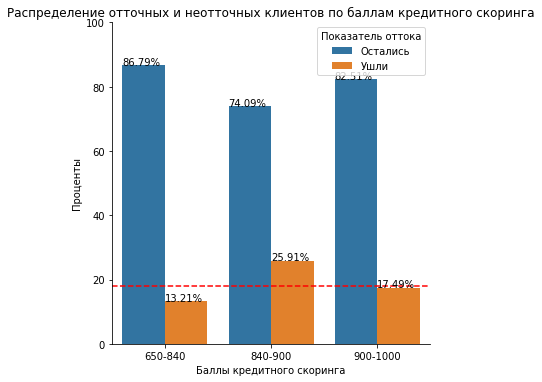

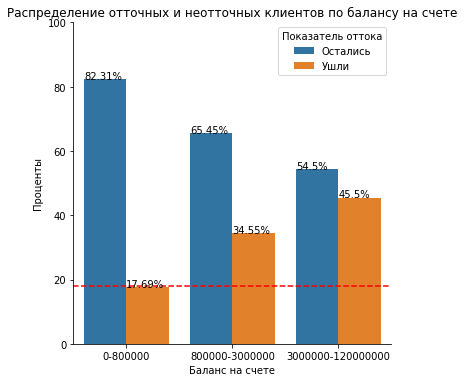

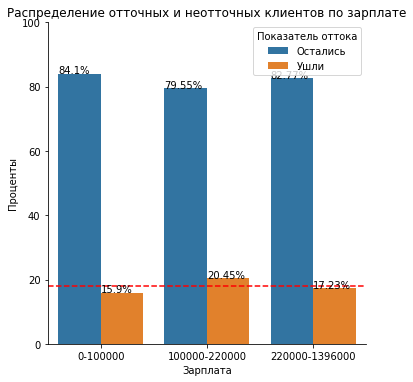

In [71]:
# построим столбчатые гистограммы признаков для тех, кто ушёл и тех, кто остался
for col, name_col, name in zip(data_col, name_col, name):
    x,y = col, 'churn'

    df1 = data.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, legend=False)
    g.ax.set_ylim(0,100)
    g.ax.set_ylabel('Проценты')
    g.ax.set_xlabel(name_col)
    g.ax.set_title(name)
    legend = g.ax.legend()
    handles = legend.legendHandles
    g.ax.legend(handles, ['Остались', 'Ушли'], title='Показатель оттока', loc='best')
    g.ax.axhline(y=average_churn*100, color='red', linestyle = '--')

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)


По столбчатым диаграммам видно, что отточных клиентов больше всего в возрасте 50-60 и 25-34 лет - их отток выше среднего, а меньше всего в возрасте 60-86 лет.
Из всех городов в процентном соотношении схожий отток. Но на первом месте стоит Ярославль - у него отток выше среднего, на втором Ростов - тоже отток выше среднего, на третьем Рыбинск.
Ушедших с отсуствием кредитной карты 25,6%, а с наличием на 11% меньше.
По количеству баллов собственности на диаграмме видно, что с увеличением баллов сильно увеличивается отток, самый сильный отток наблюдается с 3 до 9 баллов собственности (выше среднего).
Женщин на 11% меньше чем мужчин в оттоке, а мужчин 23,7% 
Отточные клиенты с активностью больше уходили.
И с увеличением количества продуктов тоже наблюдается увеличение оттока. У клиентов, использующих 2-5 продуктов - отток выше среднего.
На 840-900 баллах кредитного скоринга отток выше среднего.
Сильный отток наблюдается при балансе на счете 800  тыс. - 120 млн.
При зарплате 100-220 тыс. отток выше среднего.

### Матрица корреляций

Проанализируем данные на предмет наличия корреляций с целевой характеристикой (churn)

In [72]:
corr = data.corr()# вычислим корреляции

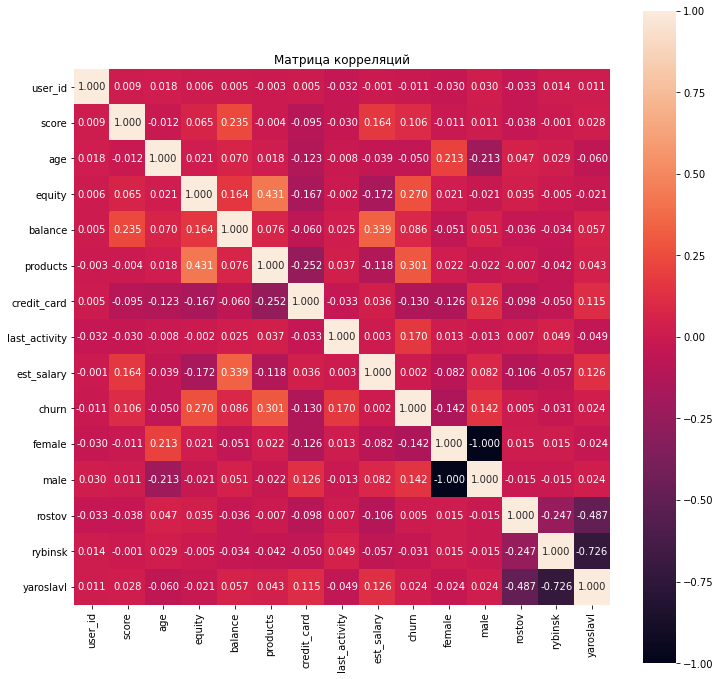

In [73]:
# отобразим корреляции на тепловой карте
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, square=True, fmt=".3f")
plt.title("Матрица корреляций");

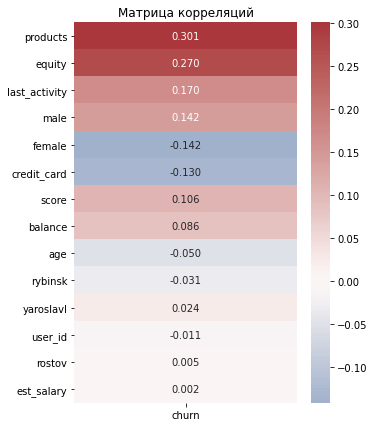

In [74]:
# отобразим корреляции целевой характеристики с признаками на тепловой карте
plt.figure(figsize=(5,7))
sns.heatmap(corr.loc[:,['churn']].drop('churn').sort_values('churn', ascending = False, key = abs), annot=True, fmt=".3f", cmap = "vlag", center = 0)
plt.title("Матрица корреляций");

По матрице корреляций на отток больше всего влияет количество используемых клиентами в банке продуктов (30%), еще влияет количество баллов собственности (27%). Затем влияние признаков снижается. И дальше идет признак активности (17%), затем пол (14.2%), за ним наличие кредитной карты (13%) и баллы кредитного скоринга (10.6%). Остальные признаки слишком слабо влияют.

**Вывод**: Мы провели исследовательский анализ данных и выяснили, что средний возраст у клиентов, которые ушли 41-42 года, у клиентов, которые остались 43 года. Баланс на счете у клиентов, которые ушли в среднем 1134458, а у оставшихся клиентов 733032. Отточные клиенты реже заводят кредитные карты, но у отточных клиентов выше баллы собственности, значит объектов собственности у них тоже больше, чем у неотточных. Зарплаты примерно на одном уровне у ушедших и оставшихся клиентов в среднем по 148,4 и 147,7 тыс. соответственно. Среди ушедших клиентов мужчин больше, чем женщин, среди оставшихся - наоборот. Ушедшие клиенты были сильнее активны в банке, чем оставшиеся. Отточные клиенты в среднем пользовались 2-3 продуктами, а неотточные 1-2. Среди отточных клиентов больше всего клиентов из Ярославля, меньше всего из Ростова. Среди неотточных - то же самое. Больше всего из характеристик влияют на отток баллы собственности, баланс, активность клиента, мужской пол, количество используемых продуктов.

Еще мы построили распределения и гистограммы, определили уровни оттока по категориям. Средний отток по банку составил 18%.

В конце проанализировали данные на предмет наличия корреляций с целевой характеристикой (churn). На отток больше всего влияет количество используемых клиентами в банке продуктов (30%), еще влияет количество баллов собственности (27%). Затем влияние признаков снижается. И дальше идет признак активности (17%), затем пол (14.2%), за ним наличие кредитной карты (13%) и баллы кредитного скоринга (10.6%). Остальные признаки слишком слабо влияют.

## Проверка гипотез

### Средний доход отточных и неотточных клиентов различается

```
H_0: Доход (est_salary) неотточных клиентов = доход (est_salary) отточных клиентов 
H_1: Доход (est_salary) неотточных клиентов ≠ доход (est_salary) отточных клиентов
alpha(α) = 0.05
```

In [75]:
sample_1 = data[data['churn']==0]['est_salary']# сохраним доход неотточных клиентов в переменную sample_1

In [76]:
sample_2 = data[data['churn']==1]['est_salary']# сохраним доход отточных клиентов в переменную sample_2

In [77]:
alpha = 0.05# задаем уровень статистической значимости

Проведем тест Колмогорова-Смирнова, чтобы определить являются ли выборки результатом нормального распределения

```
H_0: Выборка имеет нормальное распределение 
H_1: Распределение в выборке не нормально
alpha(α) = 0.05
```

In [78]:
alpha = 0.05# задаем уровень статистической значимости

In [79]:
# проведем проверку на "нормальность" у выборки sample_1
results = kstest(sample_1, 'norm')
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [80]:
# проведем проверку на "нормальность" у выборки sample_2
results = kstest(sample_2, 'norm')
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Поскольку p-значения меньше 0.05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения.

Выберем критерий для проверки наших гипотез.

U-критерий Манна-Уитни – непараметический статистический критерий, используется для оценки различий между двумя независимыми и несвязанными выборками по уровню какого-либо признака, измеренного количественно, например, для обнаружения различий в средних значениях двух генеральных совокупности.

Условия применения критерия:
- Зависимая переменная должна измеряться в порядковой или непрерывной шкале
- Независимая переменная должна состоять из двух категориальных независимых групп
- Наблюдения должны быть независимыми (не должно быть никаких отношений между двумя группами или внутри каждой группы)

t-критерий Стьюдента -  параметический статистический критерий, применяется для проверки равенства средних значений в двух выборках

Условия применения статистического критерия т-теста (критерия Стьюдента):

— выборочные средние должны быть нормально распределены;

— данные количественные;

— и это две независимые между собой выборки, так как для парных выборок существует свой парный т-критерий (paired t-test).

Для проверки нам подходит U-критерий Манна-Уитни, так как все условия для наших выборок соблюдаются.

In [81]:
results = st. mannwhitneyu (sample_1, sample_2)
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


Поскольку p-значение меньше 0.05, есть основания отвергнуть нулевую гипотезу о равенстве среднего дохода отточных и неотточных клиентов в пользу альтернативной гипотезы.

Проверим нашу гипотезу и на т-тесте,
уровень значимости = 0.05

In [82]:
results = st.ttest_ind(sample_1, sample_2)
p_value = results[1]
print('p-значение:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу


А вот на этом тесте у нас другой результат, и нет оснований отвергать нулевую гипотезу о равенстве средних двух выборок. Это и показывает, что очень важно выбрать правильный тест.

Когда в данных есть большие выбросы, алгебраические метрики работают плохо. Одно выбивающееся значение существенно влияет на результат.

### Средний возраст неотточных клиентов больше среднего возраста отточных клиентов

Проверим следующую гипотезу

```
H_0: Возраст (age) неотточных клиентов = возраст (age) отточных клиентов
H_1: Возраст (age) неотточных клиентов > возраст (age) отточных клиентов
alpha(α) = 0.05
```


In [83]:
group1 = data[data['churn']==0]['age']# сохраним возраст неотточных клиентов в переменную group1

In [84]:
group2 = data[data['churn']==1]['age']# сохраним возраст отточных клиентов в переменную group2

In [85]:
alpha = 0.05# задаем уровень статистической значимости

Проведем тест Колмогорова-Смирнова и Шапиро-Уилка, чтобы определить являются ли выборки результатом нормального распределения. Тест Шапиро-Уилка проведем для второй выборки, так как она не такая большая, как первая, а на тест Шапиро-Уилка есть ограничение по выборке. Размер выборки должен быть от 3 до 5000.

In [86]:
results = kstest(group1, 'norm')
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha :
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [87]:
results = st.shapiro(group2)
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  6.457381867311257e-24
Отвергаем нулевую гипотезу: распределение не нормально


Поскольку p-значения меньше 0.05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборки не имеют нормального распределения.

И снова для проверки гипотез нам подойдет U-критерий Манна-Уитни 

In [88]:
results = st. mannwhitneyu (group1, group2, alternative='greater')
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha and (sum(group1)/len(group1) > sum(group2)/len(group2)):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.905956383990261e-06
Отвергаем нулевую гипотезу


И снова p-значение меньше 0.05, есть основания отвергнуть нулевую гипотезу о равенстве среднего возраста отточных и неотточных клиентов в пользу альтернативной гипотезы.

**Вывод**: Мы отвергли нулевую гипотезу о равенстве среднего дохода отточных и неотточных клиентов в пользу альтернативной гипотезы и отвергли нулевую гипотезу о равенстве среднего возраста отточных и неотточных клиентов в пользу альтернативной гипотезы.

## Выявление показателей, влияющих на отток

1. Баллы собственности - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме виден отток выше среднего от 3 до 9 баллов, берем этот показатель в сегментацию;
2. Продукты - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме виден отток выше среднего на 2-5 продуктах, берем этот показатель в сегментацию;
3. Кредитная карта - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме у клиентов без кредитной карты отток выше среднего, берем этот показатель в сегментацию;
4. Активность - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме у активных клиентов отток выше среднего, берем этот показатель в сегментацию;
5. Пол - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме у мужчин отток выше среднего, берем этот показатель в сегментацию;
6. Город - по корреляциям и сравнению портретов не видна связь с оттоком, по диаграмме у Ярославля и Ростова отток чуть выше среднего, не берем этот показатель в сегментацию;
7. Возраст - по корреляциям и сравнению портретов не видна связь с оттоком, в возрасте 25-34 и 50-60 лет виден отток выше среднего, при проверке гипотез тест выявил наличие статистически значимой разницы между оставшимися и отточными пользователями в среднем возрасте клиентов, не берем этот показатель в сегментацию;
8. Зарплата - по корреляциям и сравнению портретов не видна связь с оттоком, при зарплате 100-220 тыс. на диаграмме отток чуть выше среднего, при проверке гипотез тест выявил наличие статистически значимой разницы между средним доходом оставшихся и отточных пользователей, не берем этот показатель в сегментацию;
9. Кредитный скоринг - по корреляциям и сравнению портретов видна небольшая связь с оттоком, при 840-900 баллах кредитного скоринга на диаграмме отток выше среднего, возьмем этот показатель в сегментацию;
10. Баланс - по корреляциям не видна связь с оттоком, по сравнению портретов баланс у отточных клиентов выше, на диаграмме отток выше среднего у пользователей с балансом на счете 800000 - 120000000, возьмем этот показатель в сегментацию;

## Сегментация клиентов на основе показателей

Объединим несколько наиболее отточных признаков и выделим по ним сегменты.

**Сегмент 1**

In [89]:
segment_1 = data[(data['gender']=='М') & (data['equity']>=5)]# выделим сегмент по признакам

In [90]:
segment_1.agg({"churn":["mean","sum","count"]})# посмотрим на долю оттока, на число ушедших, и на всех клиентов в сегменте

,churn
mean,0.413547
sum,464.000000
count,1122.000000


In [91]:
round(segment_1.agg('mean'),2)# посмотрим на средние значения этого сегмента

user_id           173838.99
score                867.40
age                   40.62
equity                 5.21
balance          1359137.16
products               2.29
credit_card            0.61
last_activity          0.53
est_salary        151700.48
churn                  0.41
female                 0.00
male                   1.00
rostov                 0.14
rybinsk                0.26
yaroslavl              0.60
dtype: float64

In [92]:
# посчитаем процент отточных и неотточных пользователей в сегменте
part_segment_1 = segment_1.groupby('churn').agg({'churn':'count'})
part_segment_1 = part_segment_1.rename(columns={'churn': 'count_churn'}).reset_index(drop=True)
part_segment_1['%_of_total'] = round(part_segment_1['count_churn']/sum(part_segment_1['count_churn'])*100,2)
part_segment_1

,count_churn,%_of_total
0,658,58.65
1,464,41.35


In [93]:
labels = ['Оставшиеся', 'Ушедшие']# сохраним названия меток для круговой диаграммы

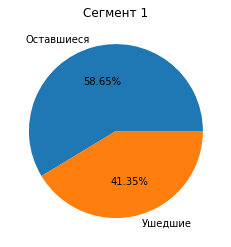

In [94]:
# построим круговую диаграмму соотношения оставшихся и ушедших клиентов в сегменте
plt.pie(part_segment_1['%_of_total'], labels = labels, autopct='%.2f%%')
plt.title('Сегмент 1')
plt.show()

В этом сегменте 41,4% оттока - 464 отточных клиентов из 1122.

Портрет клиентов 1 сегмента:
1. Пол: мужской
2. Город: любой
3. Баланс: в среднем 1359137
4. Возраст: в среднем 40-41 год
5. Кредитная карта: есть у 61% клиентов
6. Баллов собственности: 5-9
7. Заработная плата: в среднем 151700
8. Активность: у 53% клиентов 
9. Продуктов: в среднем 2-3
10. Баллов кредитного скоринга: в среднем 867

**Сегмент 2**

In [95]:
segment_2 = data[(data['gender']=='М') & (data['balance_intervals']=='800000-3000000')]# выделим сегмент по признакам

In [96]:
segment_2.agg({"churn":["mean","sum","count"]})# посмотрим на долю оттока, на число ушедших, и на всех клиентов в сегменте

,churn
mean,0.450175
sum,515.000000
count,1144.000000


In [97]:
round(segment_2.agg('mean'),2)# посмотрим на средние значения этого сегмента

user_id           175804.57
score                866.50
age                   42.63
equity                 4.17
balance          1345318.62
products               2.24
credit_card            0.59
last_activity          0.51
est_salary        156070.76
churn                  0.45
female                 0.00
male                   1.00
rostov                 0.14
rybinsk                0.26
yaroslavl              0.60
dtype: float64

In [98]:
# посчитаем процент отточных и неотточных пользователей в сегменте
part_segment_2 = segment_2.groupby('churn').agg({'churn':'count'})
part_segment_2 = part_segment_2.rename(columns={'churn': 'count_churn'}).reset_index(drop=True)
part_segment_2['%_of_total'] = round(part_segment_2['count_churn']/sum(part_segment_2['count_churn'])*100,2)
part_segment_2

,count_churn,%_of_total
0,629,54.98
1,515,45.02


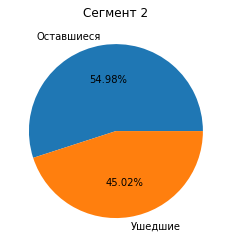

In [99]:
# построим круговую диаграмму соотношения оставшихся и ушедших клиентов в сегменте
plt.pie(part_segment_2['%_of_total'], labels = labels, autopct='%.2f%%')
plt.title('Сегмент 2')
plt.show()

В этом сегменте 45% оттока - 515 отточных клиентов из 1144.

Портрет клиентов 2 сегмента:
1. Пол: мужской
2. Город: любой,
3. Баланс: 800000-3000000
4. Возраст: в среднем 42-43 года
5. Кредитная карта: есть у 59% клиентов
6. Баллов собственности: в среднем 4-5
7. Заработная плата: в среднем 156070
8. Активность: в среднем 51%
9. Продуктов: в среднем 2-3
10. Баллов кредитного скоринга: в среднем 867

**Сегмент 3**

In [100]:
segment_3 = data[(data['last_activity']==1)&(data['score_intervals']=='840-900')& (data['credit_card']==0)]# выделим сегмент по признакам

In [101]:
segment_3.agg({"churn":["mean","sum","count"]})# посмотрим на долю оттока, на число ушедших, и на всех клиентов в сегменте

,churn
mean,0.501484
sum,338.000000
count,674.000000


In [102]:
round(segment_3.agg('mean'),2)# посмотрим на средние значения этого сегмента

user_id          169082.46
score               870.30
age                  44.87
equity                3.48
balance          917541.33
products              2.22
credit_card           0.00
last_activity         1.00
est_salary       128085.60
churn                 0.50
female                0.59
male                  0.41
rostov                0.18
rybinsk               0.35
yaroslavl             0.47
dtype: float64

In [103]:
# посчитаем процент отточных и неотточных пользователей в сегменте
part_segment_3 = segment_3.groupby('churn').agg({'churn':'count'})
part_segment_3 = part_segment_3.rename(columns={'churn': 'count_churn'}).reset_index(drop=True)
part_segment_3['%_of_total'] = round(part_segment_3['count_churn']/sum(part_segment_3['count_churn'])*100,2)
part_segment_3

,count_churn,%_of_total
0,336,49.85
1,338,50.15


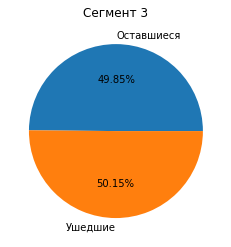

In [104]:
# построим круговую диаграмму соотношения оставшихся и ушедших клиентов в сегменте
plt.pie(part_segment_3['%_of_total'], labels = labels, autopct='%.2f%%')
plt.title('Сегмент 3')
plt.show()

В этом сегменте 50% оттока - 338 отточных клиентов из 674.

Портрет клиентов 3 сегмента:
1. Пол: любой
2. Город: любой
3. Баланс: в среднем 917541
4. Возраст: в среднем 45 лет
5. Кредитная карта: нет ни у одного клиента
6. Баллов собственности: в среднем 3-4
7. Заработная плата: в средем 128085
8. Активность: все активные
9. Продуктов: в среднем 2
10. Баллов кредитного скоринга: 840-900

Вывод: Мы провели сегментацию клиентов на основе показателей отточности и выделили 3 сегмента, составили их портреты.
    
Портрет клиентов 1 сегмента:
1. Пол: мужской
2. Город: любой
3. Баланс: в среднем 1359137
4. Возраст: в среднем 40-41 год
5. Кредитная карта: есть у 61% клиентов
6. Баллов собственности: 5-9
7. Заработная плата: в среднем 151700
8. Активность: у 53% клиентов 
9. Продуктов: в среднем 2-3
10. Баллов кредитного скоринга: в среднем 867
    
Портрет клиентов 2 сегмента:
1. Пол: мужской
2. Город: любой,
3. Баланс: 800000-3000000
4. Возраст: в среднем 42-43 года
5. Кредитная карта: есть у 59% клиентов
6. Баллов собственности: в среднем 4-5
7. Заработная плата: в среднем 156070
8. Активность: в среднем 51%
9. Продуктов: в среднем 2-3
10. Баллов кредитного скоринга: в среднем 867
    
Портрет клиентов 3 сегмента:
1. Пол: любой
2. Город: любой
3. Баланс: в среднем 917541
4. Возраст: в среднем 45 лет
5. Кредитная карта: нет ни у одного клиента
6. Баллов собственности: в среднем 3-4
7. Заработная плата: в средем 128085
8. Активность: все активные
9. Продуктов: в среднем 2
10. Баллов кредитного скоринга: 840-900
    
Приоритизируем сегменты (от высокого приоритета к низкому):
Сегмент 3, Сегмент 2, Сегмент 1


In [105]:
### КОД РЕВЬЮЕРА
df=data
qrys = (
    'gender == "М" and equity >= 5',
    'gender == "М" and balance_intervals =="800000-3000000"',
    'last_activity == 1 and score_intervals =="840-900" and credit_card ==0')

display(
    pd.concat([pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys]).style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))

all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты ниже некорректны, нужно 3 лучших сегмента')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
"gender == ""М"" and equity >= 5",41.4%,1_122
"gender == ""М"" and balance_intervals ==""800000-3000000""",45.0%,1_144
"last_activity == 1 and score_intervals ==""840-900"" and credit_card ==0",50.1%,674


Хороший результат, в сегменты попало: 934/1818 = 51.4%


## Выводы и базовые рекомендации по работе с клиентами

### Выводы

Мы выяснили, что средний возраст у клиентов, которые ушли 41-42 года, у клиентов, которые остались 43 года. Баланс на счете у клиентов, которые ушли в среднем 1134458, а у оставшихся клиентов 733032. Отточные клиенты реже заводят кредитные карты, но у отточных клиентов выше баллы собственности, значит объектов собственности у них тоже больше, чем у неотточных. Зарплаты примерно на одном уровне у ушедших и оставшихся клиентов в среднем по 148,4 и 147,7 тыс. соответственно. Среди ушедших клиентов мужчин больше, чем женщин, среди оставшихся - наоборот. Ушедшие клиенты были сильнее активны в банке, чем оставшиеся. Отточные клиенты в среднем пользовались 2-3 продуктами, а неотточные 1-2. Среди отточных клиентов больше всего клиентов из Ярославля, меньше всего из Ростова. Среди неотточных - то же самое. Больше всего из характеристик влияют на отток баллы собственности, баланс, активность клиента, мужской пол, количество используемых продуктов.

Еще мы построили распределения и гистограммы, определили уровни оттока по категориям. Средний отток по банку составил 18%.

В конце проанализировали данные на предмет наличия корреляций с целевой характеристикой (churn). На отток больше всего влияет количество используемых клиентами в банке продуктов (30%), еще влияет количество баллов собственности (27%). Затем влияние признаков снижается. И дальше идет признак активности (17%), затем пол (14.2%), за ним наличие кредитной карты (13%) и баллы кредитного скоринга (10.6%). Остальные признаки слишком слабо влияют.

Выявили показатели, влияющие на отток:
1. Баллы собственности - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме виден отток выше среднего от 3 до 9 баллов, берем этот показатель в сегментацию;
2. Продукты - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме виден отток выше среднего на 2-5 продуктах, берем этот показатель в сегментацию;
3. Кредитная карта - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме у клиентов без кредитной карты отток выше среднего, берем этот показатель в сегментацию;
4. Активность - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме у активных клиентов отток выше среднего, берем этот показатель в сегментацию;
5. Пол - по корреляциям и сравнению портретов видна связь с оттоком, по диаграмме у мужчин отток выше среднего, берем этот показатель в сегментацию;
6. Город - по корреляциям и сравнению портретов не видна связь с оттоком, по диаграмме у Ярославля и Ростова отток чуть выше среднего, не берем этот показатель в сегментацию;
7. Возраст - по корреляциям и сравнению портретов не видна связь с оттоком, в возрасте 25-34 и 50-60 лет виден отток выше среднего, при проверке гипотез тест выявил наличие статистически значимой разницы между оставшимися и отточными пользователями в среднем возрасте клиентов, не берем этот показатель в сегментацию;
8. Зарплата - по корреляциям и сравнению портретов не видна связь с оттоком, при зарплате 100-220 тыс. на диаграмме отток чуть выше среднего, при проверке гипотез тест выявил наличие статистически значимой разницы между средним доходом оставшихся и отточных пользователей, не берем этот показатель в сегментацию;
9. Кредитный скоринг - по корреляциям и сравнению портретов видна небольшая связь с оттоком, при 840-900 баллах кредитного скоринга на диаграмме отток выше среднего, возьмем этот показатель в сегментацию;
10. Баланс - по корреляциям не видна связь с оттоком, по сравнению портретов баланс у отточных клиентов выше, на диаграмме отток выше среднего у пользователей с балансом на счете 800000 - 120000000, возьмем этот показатель в сегментацию;

Провели сегментацию клиентов на основе показателей отточности и выделили 3 сегмента, составили их портреты.
    
Портрет клиентов 1 сегмента:
1. Пол: мужской
2. Город: любой
3. Баланс: в среднем 1359137
4. Возраст: в среднем 40-41 год
5. Кредитная карта: есть у 61% клиентов
6. Баллов собственности: 5-9
7. Заработная плата: в среднем 151700
8. Активность: у 53% клиентов 
9. Продуктов: в среднем 2-3
10. Баллов кредитного скоринга: в среднем 867
    
Портрет клиентов 2 сегмента:
1. Пол: мужской
2. Город: любой,
3. Баланс: 800000-3000000
4. Возраст: в среднем 42-43 года
5. Кредитная карта: есть у 59% клиентов
6. Баллов собственности: в среднем 4-5
7. Заработная плата: в среднем 156070
8. Активность: в среднем 51%
9. Продуктов: в среднем 2-3
10. Баллов кредитного скоринга: в среднем 867
    
Портрет клиентов 3 сегмента:
1. Пол: любой
2. Город: любой
3. Баланс: в среднем 917541
4. Возраст: в среднем 45 лет
5. Кредитная карта: нет ни у одного клиента
6. Баллов собственности: в среднем 3-4
7. Заработная плата: в средем 128085
8. Активность: все активные
9. Продуктов: в среднем 2
10. Баллов кредитного скоринга: 840-900
    
Приоритизировали сегменты (от высокого приоритета к низкому):
Сегмент 3, Сегмент 2, Сегмент 1


### Рекомендации по работе с клиентами

Рекомендации по 1-2 сегменту:
1. Предложить выгодно для клиента хранить документы и ценности в банковских ячейках
2. Предложить доверительное управление недвижимым имуществом
3. Увеличить беспроцентный период у кредитных карт
4. Убрать ежегодную комиссию за ведение кредитной карты
5. Пересмотреть процентную ставку в кредитной карте
6. Реализовать кэшбек в кредитных картах
7. Реализовать выгодный автокредит
8. Улучшить условия кредитования мужчин 
9. Снизить минимальный возрастной порог по ипотеке для мужчин

Рекомендации по 3 сегменту:
1. Для клиентов с меньшими накоплениями предложить:
Выгодные вклады на меньшую сумму, сделать вклады с накоплениями.

Рекомендации по всем сегментам:
1. Вклады под более выгодную ставку и сократить срок вклада
2. Пересмотреть и улучшить инвестиционные программы
3. Улучшить продукты страхования вкладов, имущества и т.п.
4. Реализовать бесплатное обслуживание расчетного счета
5. Порекомендовать клиентам разместить деньги в паевой инвестиционный фонд
6. Улучшить старые продукты и реализовать новые.